# Dataset Link

https://www.kaggle.com/datasets/sdolezel/black-friday?select=train.csv

# Connecting Google Drive with Colab

In [47]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Exploration

**Reading Training CSV File**

In [3]:
df = pd.read_csv('/content/drive/My Drive/ML_LAB_PROJECT/sales.csv')

**View the first few rows**

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Statistical Summary**

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


**Data Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Shape of dataset (rows & columns)**

In [7]:
print(f'Rows = {df.shape[0]}\nColumns = {df.shape[1]}')

Rows = 550068
Columns = 12


**Unique values in each columns**

In [8]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Exploratory Data Analysis

**Visualize the distribution of purchase amounts**

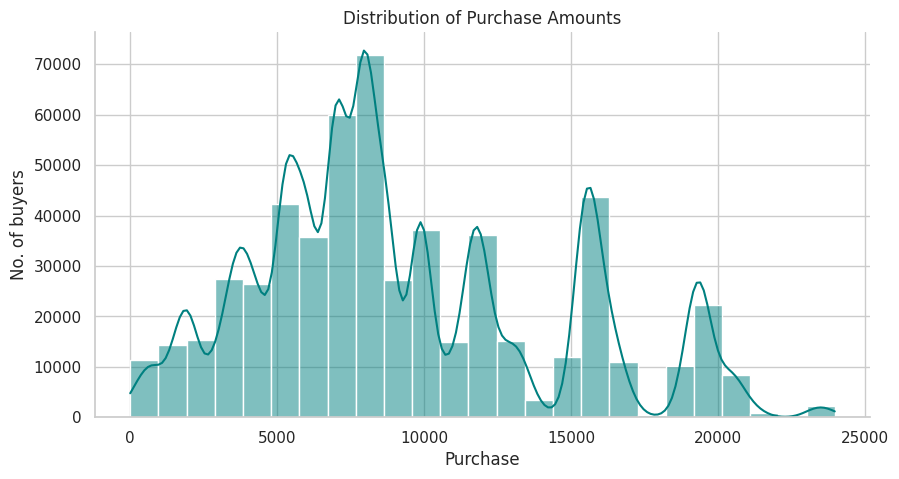

In [9]:
# Set the style
sns.set(style="whitegrid")

# Create the distplot for 'Purchase'
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], bins=25, kde=True, color='teal')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase')
plt.ylabel('No. of buyers')

# Remove top and right spines (borders)
sns.despine()

plt.show()

**Count plots for gender, age, marital status, occupation, stay in current city years**

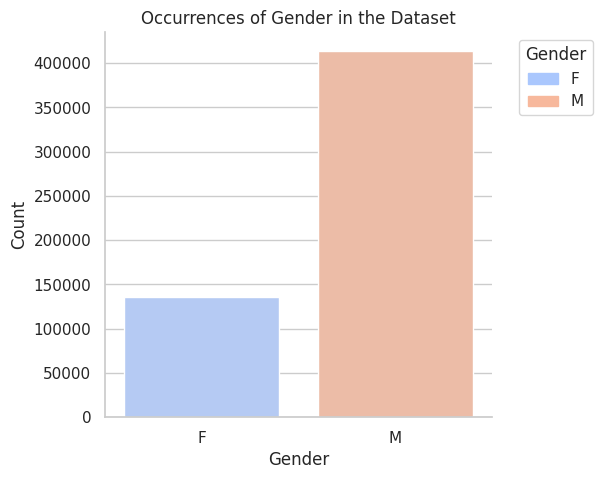

In [10]:
# The countplot shows the occurences of the gender in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Gender'].nunique())

# Create a dictionary mapping each gender to a color
gender_colors = dict(zip(df['Gender'].unique(), palette))

# Create the countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Gender', palette=gender_colors, hue='Gender', dodge=False, legend=False)
plt.title('Occurrences of Gender in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=gender_colors[gender]) for gender in df['Gender'].unique()]
plt.legend(handles, df['Gender'].unique(), title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove top and right spines (borders)
sns.despine()

plt.show()

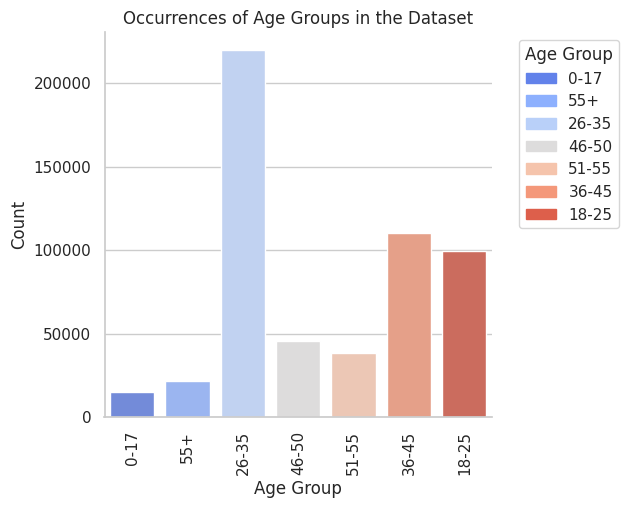

In [11]:
# The countplot shows the occurences of the Age in the dataset

# Set the style
sns.set(style="whitegrid")


# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Age'].nunique())

# Create a dictionary mapping each age group to a color
age_colors = dict(zip(df['Age'].unique(), palette))

# Create the countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Age', palette=age_colors, hue='Age', dodge=False, legend=False)
plt.title('Occurrences of Age Groups in the Dataset')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=age_colors[age]) for age in df['Age'].unique()]
plt.legend(handles, df['Age'].unique(), title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove top and right spines (borders)
sns.despine()

plt.show()


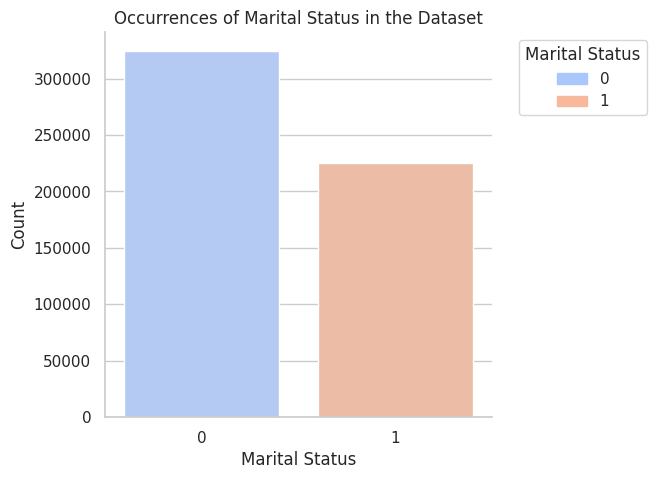

In [12]:
# The countplot shows the occurences of the Marital_status in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Marital_Status'].nunique())

# Create a dictionary mapping each marital status to a color
marital_status_colors = dict(zip(df['Marital_Status'].unique(), palette))

# Create the countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Marital_Status', palette=marital_status_colors, hue='Marital_Status', dodge=False, legend=False)
plt.title('Occurrences of Marital Status in the Dataset')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=marital_status_colors[status]) for status in df['Marital_Status'].unique()]
plt.legend(handles, df['Marital_Status'].unique(), title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove top and right spines (borders)
sns.despine()

plt.show()

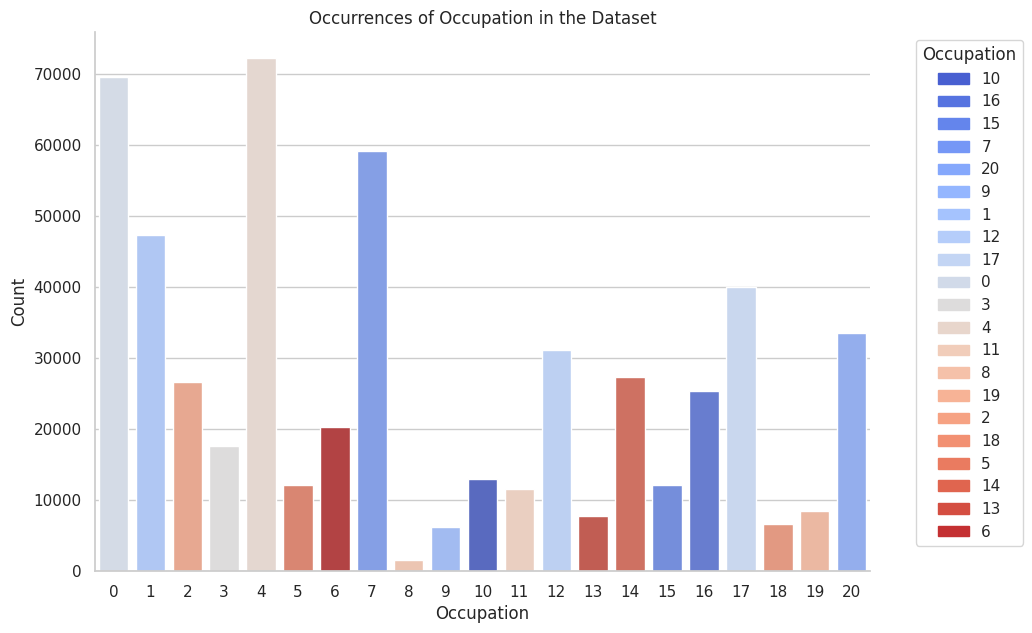

In [13]:
# The countplot shows the occurences of the Occupation in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Occupation'].nunique())

# Create a dictionary mapping each marital status to a color
occupation_colors = dict(zip(df['Occupation'].unique(), palette))

# Create the countplot
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Occupation', palette=occupation_colors, hue='Occupation', dodge=False, legend=False)
plt.title('Occurrences of Occupation in the Dataset')
plt.xlabel('Occupation')
plt.ylabel('Count')

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color= occupation_colors[status]) for status in df['Occupation'].unique()]
plt.legend(handles, df['Occupation'].unique(), title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove top and right spines (borders)
sns.despine()

plt.show()

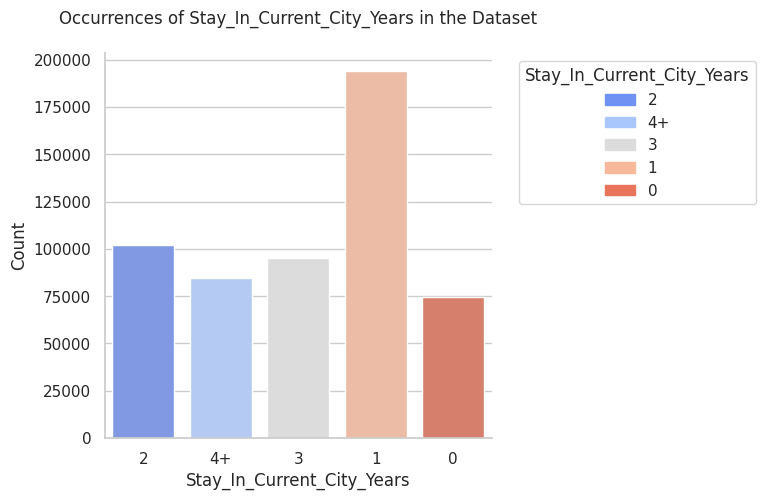

In [14]:
# The countplot shows the occurences of the Stay_In_Current_City_Years in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Stay_In_Current_City_Years'].nunique())

# Create a dictionary mapping each marital status to a color
marital_status_colors = dict(zip(df['Stay_In_Current_City_Years'].unique(), palette))

# Create the countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Stay_In_Current_City_Years', palette=marital_status_colors, hue='Stay_In_Current_City_Years', dodge=False, legend=False)
plt.title('Occurrences of Stay_In_Current_City_Years in the Dataset\n')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=marital_status_colors[status]) for status in df['Stay_In_Current_City_Years'].unique()]
plt.legend(handles, df['Stay_In_Current_City_Years'].unique(), title='Stay_In_Current_City_Years', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove top and right spines (borders)
sns.despine()

plt.show()

**Bar plots for purchasing power by city category**

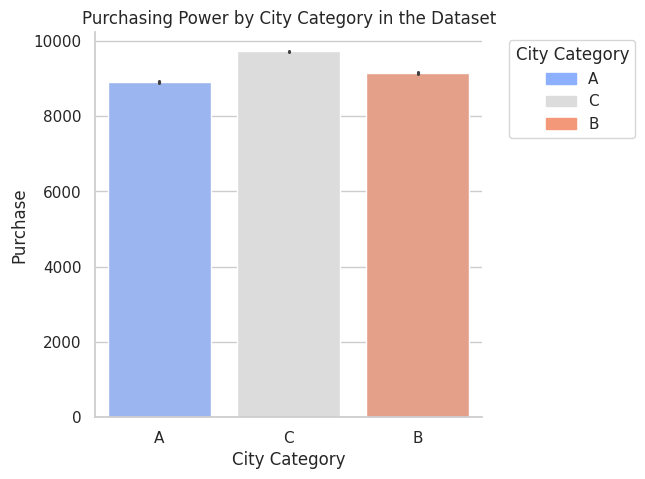

In [15]:
# The barplot shows the purchasing power according to city category in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette('coolwarm', len(df['City_Category'].unique()))
city_category_colors = dict(zip(df['City_Category'].unique(), palette))

# Create the barplot
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='City_Category', y='Purchase', palette=city_category_colors)
plt.title('Purchasing Power by City Category in the Dataset')
plt.xlabel('City Category')
plt.ylabel('Purchase')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=city_category_colors[category]) for category in df['City_Category'].unique()]
plt.legend(handles, df['City_Category'].unique(), title='City Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove top and right spines (borders)
sns.despine()

plt.show()

**Bar plots for purchasing power by gender with occupation**

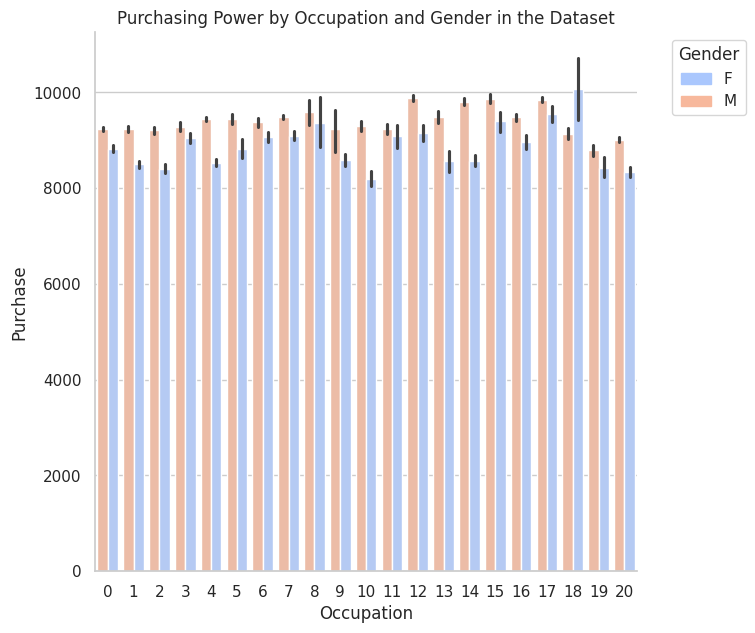

In [16]:
# The barplot shows the purchasing power of the gender with number of occupations in the dataset

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
palette = sns.color_palette('coolwarm', df['Gender'].nunique())

# Create a dictionary mapping each gender to a color
gender_colors = dict(zip(df['Gender'].unique(), palette))

# Create the barplot
plt.figure(figsize=(7,7))
sns.barplot(data=df, x='Occupation', y='Purchase', hue='Gender', palette=gender_colors)
plt.title('Purchasing Power by Occupation and Gender in the Dataset')
plt.xlabel('Occupation')
plt.ylabel('Purchase')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=gender_colors[gender]) for gender in df['Gender'].unique()]
plt.legend(handles, df['Gender'].unique(), title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove top and right spines (borders)
sns.despine()

plt.show()

# Preprocessing

**Check for duplicates**

In [17]:
df.duplicated().sum()

0

**Null values in total**

In [18]:
print(f'Total null values = {df.isnull().sum().sum()}')

Total null values = 556885


**Null values columns-wise**

In [19]:
missing_values= df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']

missing_values

,Column,Missing Values
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,173638


**Null values in percentage column-wise**

In [20]:
missing_values= (df.isnull().sum() / df.shape[0] * 100).reset_index()
missing_values.columns = ['Column', 'Missing Values(%)']

missing_values

,Column,Missing Values(%)
0,User_ID,0.000000
1,Product_ID,0.000000
2,Gender,0.000000
3,Age,0.000000
4,Occupation,0.000000
5,City_Category,0.000000
6,Stay_In_Current_City_Years,0.000000
7,Marital_Status,0.000000
8,Product_Category_1,0.000000
9,Product_Category_2,31.566643


**Handle missing values by dropping columns with over 60% missing values and imputing others**

We are dropping this column because this column contains more than 60% null values.

In [21]:
df.drop(columns = 'Product_Category_3', inplace=True)

We are imputing the null values with median because the feature contains null values.

In [22]:
imp = SimpleImputer(strategy='median')

imp.fit(df[['Product_Category_2']])

df['Product_Category_2'] = imp.transform(df[['Product_Category_2']])

**Verifying handling of missing values through column-wise sum**

In [23]:
removing_missing_values= df.isnull().sum().reset_index()
removing_missing_values.columns = ['Column', 'Missing Values']

removing_missing_values

,Column,Missing Values
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,0


#### Label Encoding

We encoded the categorical features because model understands number values.

In [24]:
le = LabelEncoder()

for i in ('Gender', 'City_Category', 'Age', 'Stay_In_Current_City_Years'):
    df[i] = le.fit_transform(df[i])

**Converting the 'Product_Category_2' column from float to integer type**

In [25]:
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')

**Verifying data types**

In [26]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int64
Age                            int64
Occupation                     int64
City_Category                  int64
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Purchase                       int64
dtype: object

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9,7969


**Identifying outliers using boxplot**

The box plot is used to visualize the distribution of the 'Purchase' values, showing potential outliers

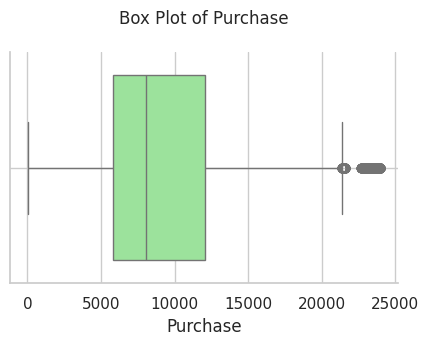

In [28]:
# Set the style
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Purchase'], color='lightgreen')
plt.title('Box Plot of Purchase\n')
plt.grid(True)

# Remove top and right spines (borders)
sns.despine()

plt.show()

**Handling outliers using IQR method and Capping the outliers instead of removing them**

Outliers are capped by replacing them with the median value of the 'Purchase' column.

In [29]:
def upper_lower_boundaries(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return (lower, upper)

lower, upper = upper_lower_boundaries(df, 'Purchase')

df['Purchase'] = np.where(df['Purchase'] > upper, df['Purchase'].median(), np.where(df['Purchase'] < lower, df['Purchase'].median(), df['Purchase']))

A new box plot is generated after handling outliers, showing a cleaner distribution.

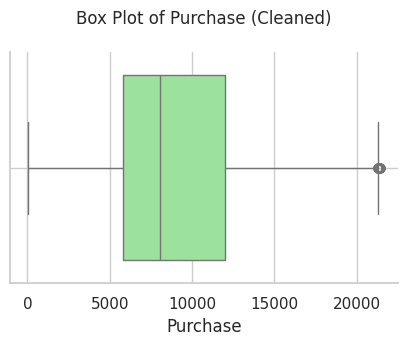

In [30]:
# Set the style
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Purchase'], color='lightgreen')
plt.title('Box Plot of Purchase (Cleaned)\n')
plt.grid(True)

# Remove top and right spines (borders)
sns.despine()

plt.show()

# Correlation Matrix

We visualize the correlation between numeric features in the dataset. This helps in understanding relationships between features.

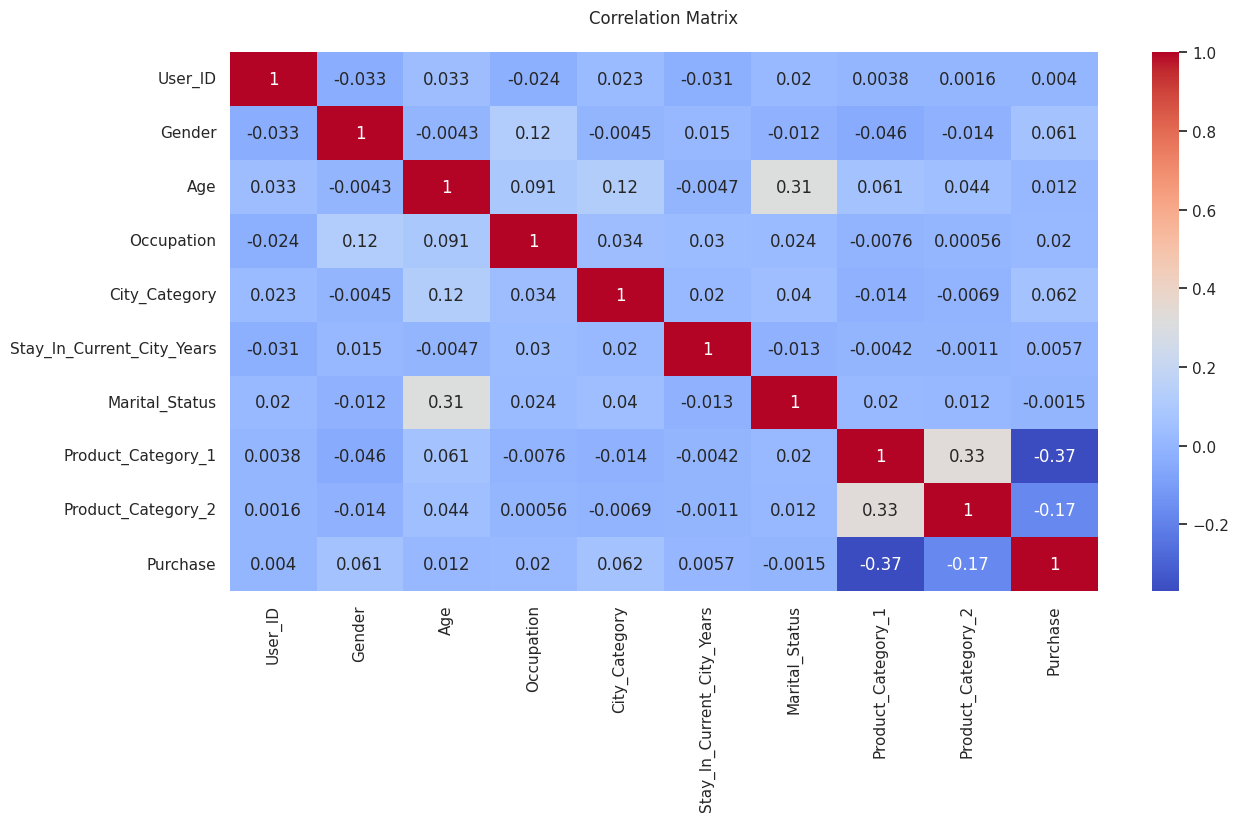

In [31]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix\n')
plt.show()

The correlation matrix showed us a strong relationship among (Product_Category_1 with Product_Category_2), (Product_Category_1 with Purchase), (Product_Category_2 with Purchase), (Marital_Status with Age).

**Input Split**

The dataset is split into features (X) and target variable (y).

In [32]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

We dropped User_ID feature because of it's higher magnitude values and this will effect our model accuracy and will cause biasness. Also this feature seams like an identifier as well which is not suitable for prediction.

We dropped Product_ID feature because it is a string type feature. Also this feature seams like an identifier as well which is not suitable for prediction.

**Information Gain**

MI measures the dependency between the feature and the target variable.
A bar plot is generated to show the MI scores of each feature.

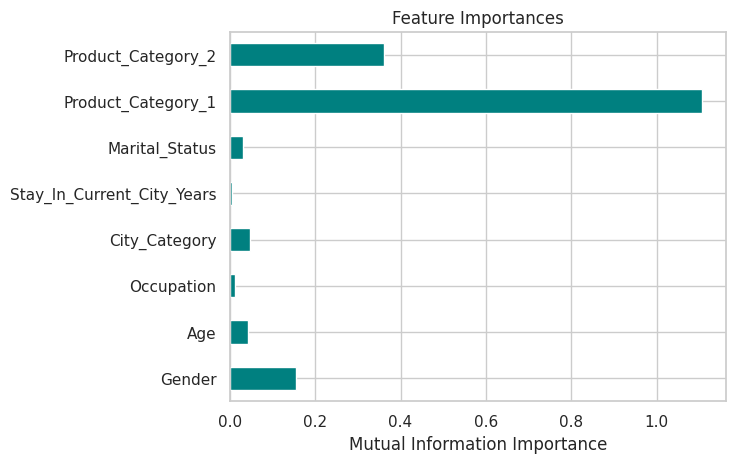

In [33]:
importance = mutual_info_classif(X, y, random_state=42)

# Create a Series with feature importances
feat_importance = pd.Series(importance, index=X.columns)

# Plot feature importances
feat_importance.plot(kind='barh', color='teal')
plt.xlabel('Mutual Information Importance')
plt.title('Feature Importances')
plt.show()

From the barplot, the significant features based on mutual information appear to be:

1) Product_Category_1

2) Product_Category_2

3) Gender

**Random forest feature selection**

A Random Forest Regressor is used to determine feature importances.
Features are ranked based on their importance scores.

In [34]:
# Random forest feature selection
rf = RandomForestRegressor(random_state=0)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names and importances into a list of tuples
feature_importance_tuples = zip(X.columns, feature_importances)

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
print("Sorted Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

Sorted Feature Importances:
Product_Category_1: 0.8265
Occupation: 0.0488
Stay_In_Current_City_Years: 0.0340
Age: 0.0284
Product_Category_2: 0.0264
Marital_Status: 0.0133
City_Category: 0.0120
Gender: 0.0106


From the sorted list of random forest importances, the significant features are:

1) Product_Category_1

2) Occupation

3) Stay_In_Current_City_Years

4) Age

5) Product_Category_2

**Fitering important features**

In [35]:
X = X.drop(columns=['City_Category', 'Marital_Status', 'Stay_In_Current_City_Years'])

We filtered features based on combined results of correlation matrix, mutual_info, and random forest selection

**Train Test Split**

The dataset is split into training and testing sets using a 70-30 split ratio.

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

**Standard Scaling**

StandardScaler is used to scale the features to have a mean of 0 and a standard deviation of 1.

This is an important step for many machine learning algorithms to perform well.

In [37]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Models Accuracy Calculation & Model Selection

In [38]:
skfold = StratifiedKFold(n_splits=5)

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
vr1 = VotingRegressor([('lr', lr), ('dt', dt), ('rf', rf), ('gb', gb)])
vr2 = VotingRegressor([('lr', lr), ('dt', dt), ('rf', rf), ('gb', gb)], weights=[1, 2, 3, 4])
knn = KNeighborsRegressor(n_neighbors=int(np.sqrt(df.shape[0]))) # Rule of Thumb
sr = StackingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('gb', gb)], final_estimator=knn, cv=skfold)

models = {
    'LR':lr,
    'DTR':dt,
    'GBR':gb,
    'RFR':rf,
    'VR':vr1,
    'VR(HPT)': vr2,
    'SR':sr
}

* StratifiedKFold cross-validator with 5 splits. We used StratifiedKFold to ensure each fold has a representative ratio of class labels.

* We initialize regressor models like Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor.

* Voting regressor combines the predictions of linear regression, decision tree, random forest, and gradient boosting models by averaging their predictions.

* We also used hyperparameter tunned voting regressor by assigning the weights of each base model inside voting regressor for better performance. The weights dictate the importance of each model in the final prediction.

In [39]:
metrics = {
    'model': [],
    'mse': [],
    'mae': [],
    'rmse': [],
    'r^2': []
}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, y_pred)

    metrics['model'].append(name)
    metrics['mae'].append(mae)
    metrics['mse'].append(mse)
    metrics['rmse'].append(rmse)
    metrics['r^2'].append(r2)

Here we calculate the performance of each model and ensemble model through performance metrics like mean absolute error, mean squared error, root mean squared error, and r^2 score.

**Visualizing Performance of each model and ensemble model**

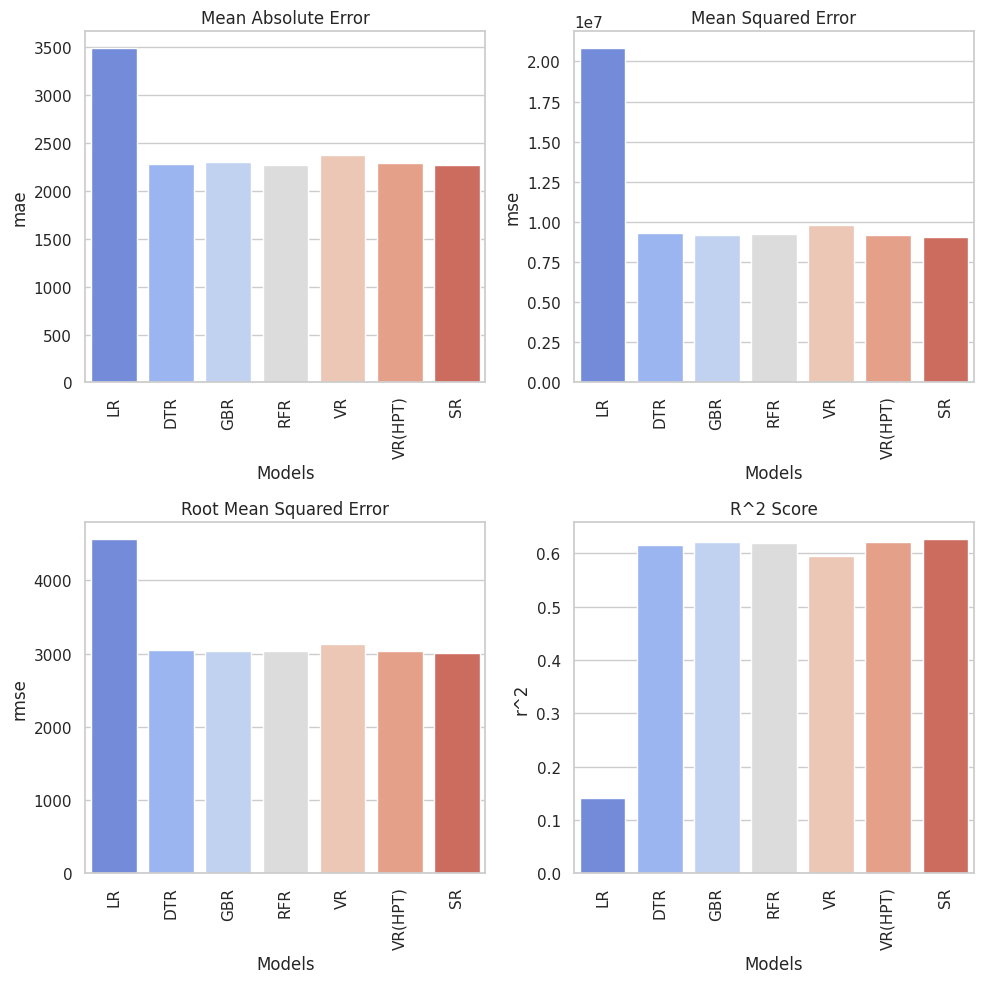

In [40]:
metrics_df = pd.DataFrame(metrics)

palette = sns.color_palette("coolwarm", len(metrics_df))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='model', y='mae', data=metrics_df, palette = palette)
plt.title('Mean Absolute Error')
plt.xlabel('Models')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.barplot(x='model', y='mse', data=metrics_df, palette = palette)
plt.title('Mean Squared Error')
plt.xlabel('Models')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.barplot(x='model', y='rmse', data=metrics_df, palette = palette)
plt.title('Root Mean Squared Error')
plt.xlabel('Models')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.barplot(x='model', y='r^2', data=metrics_df, palette = palette)
plt.title('R^2 Score')
plt.xlabel('Models')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Through this barplot graph, we conclude that ensemble learning model (Stacking Regressor with 0.626 R^2) performs better than any other model or ensemble model.

In [41]:
metrics_df

,model,mse,mae,rmse,r^2
0,LR,2.083384e+07,3491.999169,4564.409700,0.140900
1,DTR,9.318177e+06,2277.957429,3052.568898,0.615758
2,GBR,9.182349e+06,2300.682907,3030.239144,0.621359
3,RFR,9.226856e+06,2272.319264,3037.574074,0.619523
4,VR,9.824651e+06,2376.071873,3134.429992,0.594873
5,VR(HPT),9.201513e+06,2295.587273,3033.399611,0.620568
6,SR,9.057000e+06,2266.688009,3009.485010,0.626527


# Cross Validation Scores (StratifiedKFold)

In [42]:
skfold = StratifiedKFold(n_splits=5)

for i in [('lr', lr), ('dt', dt), ('rf', rf), ('gb', gb), ('vr', vr1), ('vr(hpt)', vr2), ('sr', sr)]:
  scores = cross_val_score(i[1], xtrain, ytrain, scoring='r2', cv=skfold, n_jobs=-1)
  print(f'{i[0]}: {scores}')

lr: [0.14553056 0.14254193 0.14359983 0.14383344 0.14447341]
dt: [0.615116   0.61803431 0.61586112 0.61648978 0.62243922]
rf: [0.62058831 0.62337233 0.62072834 0.62206383 0.62758311]
gb: [0.62544946 0.62868084 0.62522942 0.62718905 0.62916812]
vr: [0.59795413 0.59993397 0.59782452 0.59855411 0.60192373]
vr(hpt): [0.62355338 0.62616718 0.62354915 0.62482509 0.628305  ]
sr: [0.62944206 0.63242392 0.62888092 0.63099299 0.63428705]


We choose StratifiedKFold cross validation because our inputs are classified into categories and when cross validation split our training data into validation data and training data 5 times, it may splits with one dominant category which may cause inaccurate results.(Overfitting)

We can do hyperparameter tunning on each model using gridsearchcv or any other other technique in order to improve our models performance... But unforunately our hardware doesnot allows us to do that on heavy dataset and keep getting crashed.

# Best Model Training

We choose Stacking Regressor as our prediction model as it is giving higher accuracy than any other models.

In [43]:
sr.fit(xtrain, ytrain)

StackingRegressor(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7BE7E9F35540, shuffle=False),
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=KNeighborsRegressor(n_neighbors=741))

# Testing model on new dataset

In [58]:
test_df = pd.read_csv('/content/drive/My Drive/ML_LAB_PROJECT/test.csv')

In [59]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [60]:
test_df.duplicated().sum()

0

In [61]:
print(f'Total null values = {test_df.isnull().sum().sum()}')

Total null values = 234906


In [62]:
missing_values= test_df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']

missing_values

,Column,Missing Values
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category_1,0
9,Product_Category_2,72344


In [63]:
missing_values= (test_df.isnull().sum() / test_df.shape[0] * 100).reset_index()
missing_values.columns = ['Column', 'Missing Values(%)']

missing_values

,Column,Missing Values(%)
0,User_ID,0.000000
1,Product_ID,0.000000
2,Gender,0.000000
3,Age,0.000000
4,Occupation,0.000000
5,City_Category,0.000000
6,Stay_In_Current_City_Years,0.000000
7,Marital_Status,0.000000
8,Product_Category_1,0.000000
9,Product_Category_2,30.969311


In [64]:
test_df.drop(columns = 'Product_Category_3', inplace=True)

In [65]:
imp = SimpleImputer(strategy='median')

imp.fit(test_df[['Product_Category_2']])

test_df['Product_Category_2'] = imp.transform(test_df[['Product_Category_2']])

In [66]:
le = LabelEncoder()

for i in ('Gender', 'City_Category', 'Age', 'Stay_In_Current_City_Years'):
    test_df[i] = le.fit_transform(test_df[i])

In [67]:
X_inputs = test_df.drop(columns=['User_ID', 'Product_ID', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years'])

In [68]:
sc = StandardScaler()
prediction_inputs = sc.fit_transform(X_inputs)

In [69]:
final_predictions = sr.predict(prediction_inputs)

In [70]:
final_predictions

array([14437.54925776, 10655.25506073,  6429.16329285, ...,
       12854.6099865 , 12240.57489879,  2435.02699055])